<a href="https://colab.research.google.com/github/ibedoor/machine-learning/blob/main/cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Assignment

#### Deleverables
- EDA 
    - Tell / show me about your data
    - Etc...
- Data prep / wrangling
    - pick & prep your features
    - [train_test_split()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - Etc...
- Model
    - Import and make a [DecisionTreeClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
    - Bonus: [GridSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) or [RandomizedSearchCV()](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
    - Bonus: [RandomForestClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
        - Explain what's going on..
- Score your model
    - Accuracy
    - Confusion matrix
    - Etc...
- Display your decision tree with [plot_tree()](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) (or similar)
    - Explain your tree
    - Etc...

In [1]:
%%capture
!pip install category-encoders
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection

[Data Source](https://archive.ics.uci.edu/ml/datasets/car+evaluation)

In [2]:
# Run to see Data Dictionary
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.names

1. Title: Car Evaluation Database

2. Sources:
   (a) Creator: Marko Bohanec
   (b) Donors: Marko Bohanec   (marko.bohanec@ijs.si)
               Blaz Zupan      (blaz.zupan@ijs.si)
   (c) Date: June, 1997

3. Past Usage:

   The hierarchical decision model, from which this dataset is
   derived, was first presented in 

   M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
   multi-attribute decision making. In 8th Intl Workshop on Expert
   Systems and their Applications, Avignon, France. pages 59-78, 1988.

   Within machine-learning, this dataset was used for the evaluation
   of HINT (Hierarchy INduction Tool), which was proved to be able to
   completely reconstruct the original hierarchical model. This,
   together with a comparison with C4.5, is presented in

   B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
   function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

4. Relevant Information Paragraph:

   Car Evaluation Database was 

In [3]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data", 
                 names=["price", "maint", "doors", "persons", "lug_boot", "safety"],).reset_index().drop("safety", axis=1)

df.columns = ["price", "maint", "doors", "persons", "lug_boot", "safety"]
df.head()

,price,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [4]:
# Ordinally Encoded DF if needed
encoder = ce.OrdinalEncoder()
df_encode = encoder.fit_transform(df)
df_encode.head()

,price,maint,doors,persons,lug_boot,safety
0,1,1,1,1,1,1
1,1,1,1,1,1,2
2,1,1,1,1,1,3
3,1,1,1,1,2,1
4,1,1,1,1,2,2


**EDA**

In [5]:
df.shape

(1728, 6)

In [6]:
df.describe()

,price,maint,doors,persons,lug_boot,safety
count,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3
top,med,med,4,more,med,med
freq,432,432,432,576,576,576


In [7]:
df.keys()

Index(['price', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [8]:
count_safety = df.safety.value_counts()

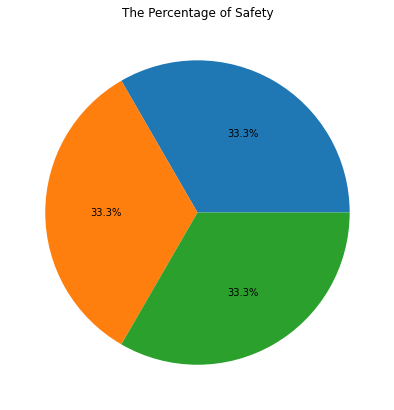

In [9]:
# deterimne figure size
plt.figure(figsize=[7,7])
plt.pie(count_safety,
        autopct='%1.1f%%')
# title
plt.title("The Percentage of Safety");

In [10]:
# correlation
corr = df_encode.corr()
corr.style.background_gradient(cmap='Set3')

,price,maint,doors,persons,lug_boot,safety
price,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
maint,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
doors,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
persons,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
lug_boot,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
safety,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [11]:
# correlation
corr = df.corr()
corr.style.background_gradient(cmap='Set3')

In [12]:
df.lug_boot.value_counts()

med      576
small    576
big      576
Name: lug_boot, dtype: int64

In [13]:
df.persons.value_counts()

more    576
4       576
2       576
Name: persons, dtype: int64

Data prep / wrangling

In [14]:
df_encode.isnull().sum()

price       0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
dtype: int64

In [15]:
# split dataset
from sklearn.model_selection import train_test_split

#X = df_encode.drop('safety', axis=1)
X = df_encode['price']
y = df_encode['safety']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

Check Accuercy before use model

In [16]:
# create empty array
models = []
# add models in array
models.append(('Decision Tree', DecisionTreeClassifier()))
# create 2 empty array to append results and names for models
results = []
names = []
# determine type scoring
scoring = 'accuracy'
# loop to 
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=None)
  cv_results = model_selection.cross_val_score(model, pd.DataFrame(X_train), y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Decision Tree: 0.301901 (0.037353)


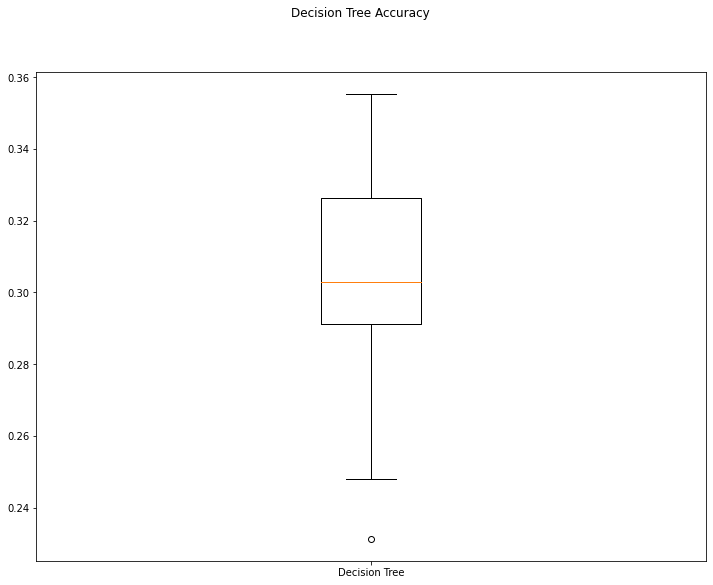

In [17]:
# determine figure size
fig = plt.figure(figsize=(12,9))
# title
fig.suptitle('Decision Tree Accuracy')
ax = fig.add_subplot(111)
# create boxplot
plt.boxplot(results)
ax.set_xticklabels(names)
# show plot
plt.show()

In [18]:
# import standard scaler
from sklearn.preprocessing import StandardScaler
# import standard scaler
from sklearn.model_selection import RandomizedSearchCV

In [19]:
#Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()

In [20]:
#Compute the mean and std to be used for later scaling
X_train = sc.fit_transform(pd.DataFrame(X_train))
#Fit to data, then transform it.
X_test = sc.transform(pd.DataFrame(X_test))

Model Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(pd.DataFrame(X_train), y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [22]:
dtc.predict(pd.DataFrame(X_test))

array([3, 3, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 2,
       3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 2, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

In [23]:
dtc.feature_importances_

array([1.])

Score Decision Tree Classifier

In [24]:
from sklearn.metrics import accuracy_score

preds = dtc.predict(pd.DataFrame(X_test))

print("Accuracy:",accuracy_score(y_test, preds)*100)

Accuracy: 28.901734104046245


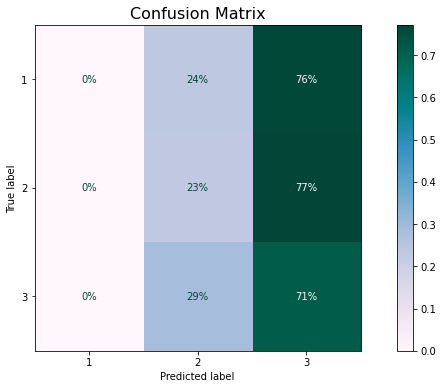

In [25]:
# confusion matrix by sklearn
from sklearn.metrics import plot_confusion_matrix
fig, ax = plt.subplots(figsize=(13, 6))
plt.title('Confusion Matrix', fontsize=16)
plot_confusion_matrix(dtc, X=pd.DataFrame(X_test), y_true=y_test, cmap='PuBuGn', ax=ax, normalize='true', values_format='.0%');

In [26]:
from sklearn.tree import plot_tree

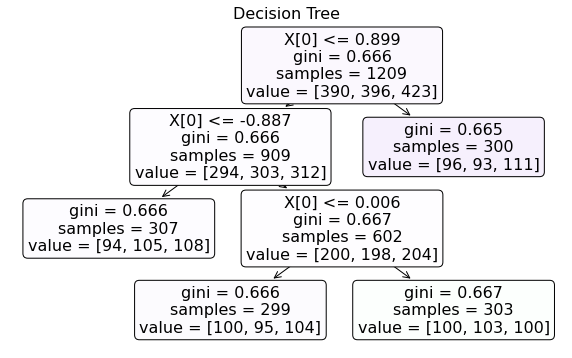

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plot_tree(dtc, filled=True, rounded=True)
plt.title('Decision Tree', fontsize=16);

GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV
param_grid ={'criterion': ['gini'],
 'max_depth': [1],
 'min_samples_leaf': [1],
 'min_samples_split': [2]}

#Make GridSearchCV
grid_search =GridSearchCV(dtc, param_grid, cv=10)

In [29]:
#fit X_train and y_train into grid_search
grid_search= grid_search.fit(X_train, y_train)
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': [1],
           

In [30]:
#best parameters of LogisticRegression after using GridSearchCV
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [31]:
grid_search.best_score_

0.3440909090909091

RandomizedSearchCV

In [32]:
param_dist = {'criterion': ['entropy'],
 'max_depth': [None],
 'max_features': [1],
 'min_samples_leaf': [6]}

In [33]:
# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

In [34]:
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)
tree_cv

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [35]:
tree_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [36]:
tree_cv.best_score_

0.3333527656801893

In [37]:
tree_cv.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 1,
 'min_samples_leaf': 6}